Documentation
This notebook covers some EDA and Data Visualization


**EDA: Exploratory Data Analysis**


*  General Information on Dataset
*   Type of dataset
*   Rows, Colunmns
*   Null Values if any
*   Numerical , Categorical Attributes

**VISUALIZATION**

*   Wordcloud of categories of startup
*   Pearson Correlation
*   Bar Graph- Competitive Count by Company
*   Bar Graph- HHI Index by Company
*   Pandas Profiling









In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import chain
%matplotlib inline


In [3]:
url = 'https://raw.githubusercontent.com/OmdenaAI/omdena-pennsylvania-startup/main/src/tasks/task-2-data-cleaning/cleaned-datasets/cleaned_owler_data_data11.csv?token=ALCX4GLM74IAWV6DE5W6UOLA6FXZ6'
df = pd.read_csv(url)
df.head()
#df.shape

,Unnamed: 0,Company.name,Company Business,Category,Company Revenue,Competitor count (cap at 10),Competitor Revenue in Total,HHI
0,0,medicalsimulation,Medical Simulation provides full-service simul...,"Biotechnology, Health Care, Hospital",10.7,10,36076.2,0.257775
1,1,cancergenetics,NaN,NaN,24.2,10,652.2,0.462750
2,2,topgifter,Search and get Gift Recommendations,"E-Commerce, Gift, Shopping",2.6,6,82.5,0.326575
3,3,pica9,The leading SaaS Brand Management Platform emp...,"Advertising, Brand Marketing, Digital Media, D...",7.0,10,214.8,0.187524
4,4,actionx,ActionX_connects gaps between mobile customer ...,"Ad Retargeting, Mobile",1.0,8,3477.9,0.479244


In [4]:
del df['Unnamed: 0']

In [5]:
df.tail()

,Company.name,Company Business,Category,Company Revenue,Competitor count (cap at 10),Competitor Revenue in Total,HHI
731,bioconsortia,"BioConsortia, based in Davis, California, is a...","Agriculture, Biotechnology, Farming",1.0,8,13436.7,0.994546
732,colonialbankfsb,Colonial Bank FSB began in 1913 as a mortgage ...,"Banking, Finance, Financial Services",17.9,10,913.8,0.743084
733,livongohealth,Livongo is empowering people with chronic cond...,"Health Care, Health Diagnostics, Information T...",30.0,9,96.8,0.245516
734,paracosm,"Paracosm develops mobile 3D scanning, progress...","3D Technology, Augmented Reality, Real Estate,...",1.2,9,77.2,0.344617
735,extremeplasticsplus,Extreme Plastics Plus is a family-owned compan...,"Advanced Materials, Fashion, Service Industry",5.0,3,34.0,0.437716


In [ ]:
df.describe()

,Company Revenue,Competitor count (cap at 10),Competitor Revenue in Total,HHI
count,736.000000,736.000000,7.360000e+02,736.000000
mean,246.428533,8.822011,2.024851e+04,0.411171
std,4479.797775,2.027593,1.120729e+05,0.240410
min,1.000000,0.000000,0.000000e+00,0.110833
25%,1.700000,9.000000,8.775000e+01,0.219016
50%,4.400000,10.000000,2.805000e+02,0.341667
75%,10.000000,10.000000,1.240100e+03,0.533178
max,115000.000000,10.000000,1.474300e+06,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Company.name                  736 non-null    object 
 1   Company Business              722 non-null    object 
 2   Category                      707 non-null    object 
 3   Company Revenue               736 non-null    float64
 4   Competitor count (cap at 10)  736 non-null    int64  
 5   Competitor Revenue in Total   736 non-null    float64
 6   HHI                           736 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 40.4+ KB


In [6]:
df.columns

Index(['Company.name', 'Company Business', 'Category', 'Company Revenue',
       'Competitor count (cap at 10)', 'Competitor Revenue in Total', 'HHI'],
      dtype='object')

In [ ]:
df.dtypes

Company.name                     object
Company Business                 object
Category                         object
Company Revenue                 float64
Competitor count (cap at 10)      int64
Competitor Revenue in Total     float64
HHI                             float64
dtype: object

In [7]:
import numpy as np
#percentage of null values in each column
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Company.name - 0%
Company Business - 2%
Category - 4%
Company Revenue - 0%
Competitor count (cap at 10) - 0%
Competitor Revenue in Total - 0%
HHI - 0%


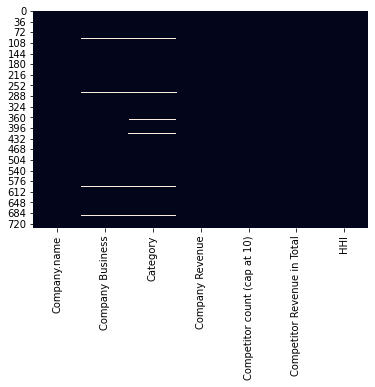

In [8]:
sns.heatmap(df.isnull(), cbar=False)

In [37]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
#LIST OF NUMERICAL FEATURES
df[numerical_features].head()

Number of numerical variables:  4


,Company Revenue,Competitor count (cap at 10),Competitor Revenue in Total,HHI
0,10.7,10,36076.2,0.257775
1,24.2,10,652.2,0.462750
2,2.6,6,82.5,0.326575
3,7.0,10,214.8,0.187524
4,1.0,8,3477.9,0.479244


In [39]:
 #Types of numerical variables - discrete & continuous variables

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
discrete_feature

Discrete Variables Count: 1


['Competitor count (cap at 10)']

In [40]:
#continuous features
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['id']]
print("Continuous feature Count {}".format(len(continuous_features)))
continuous_features

Continuous feature Count 3


['Company Revenue', 'Competitor Revenue in Total', 'HHI']

In [9]:
#Lemmatization
import re
import string

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [11]:
def clean_text(text):

  text = str(text).lower()

  text = re.sub('https?://\S+|www\.\S+','',text)
  text = re.sub('<.,*?>+','',text)
  text = re.sub('[%s]' % re.escape(string.punctuation),'',text)

  return text

In [12]:
stop_words = stopwords.words('english')

In [13]:
lemmatizer = WordNetLemmatizer()

In [14]:
def preprocess_textdata(text):

  """util function to preprocess text data"""

  text = clean_text(text)
  text = ' '.join(w for w in text.split(' ') if w not in stop_words)
  text = ' '.join(lemmatizer.lemmatize(w) for w in text.split(' '))

  return text

In [15]:
df['category_clean'] = df['Category'].apply(preprocess_textdata)
df['category_clean']

0                     biotechnology health care hospital
1                                                    nan
2                                ecommerce gift shopping
3      advertising brand marketing digital medium dir...
4                                  ad retargeting mobile
                             ...                        
731                    agriculture biotechnology farming
732                    banking finance financial service
733    health care health diagnostics information tec...
734    3d technology augmented reality real estate ro...
735           advanced material fashion service industry
Name: category_clean, Length: 736, dtype: object

In [17]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [18]:
count_vec = CountVectorizer()

count_dtm = count_vec.fit_transform(df['category_clean'])

words = count_vec.get_feature_names()
words_count = count_dtm.sum(axis=0).A1

words_dict = dict(zip(words,words_count))

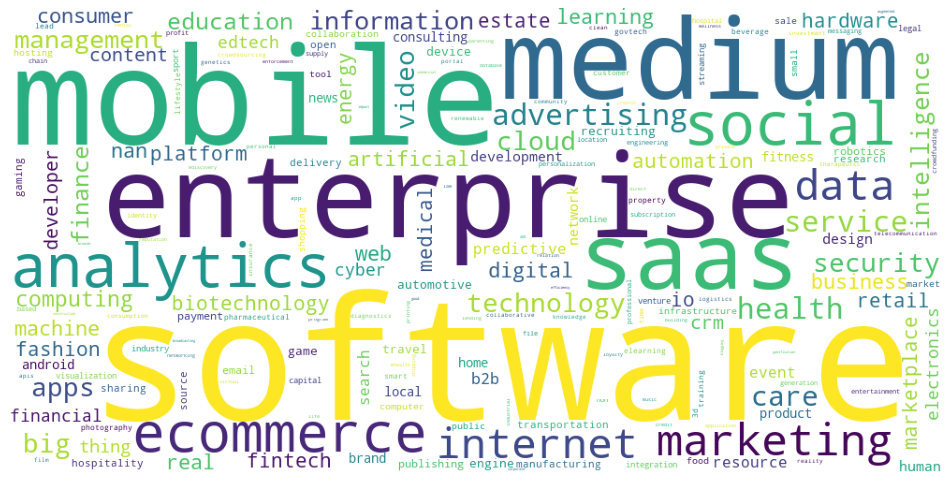

In [19]:
# A word cloud representing the most category of industries
wc = WordCloud(
    background_color = 'white',
    width = 1000,
    height= 500
).generate_from_frequencies(words_dict)

plt.figure(figsize = (13,8))
plt.axis("off")
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.show()

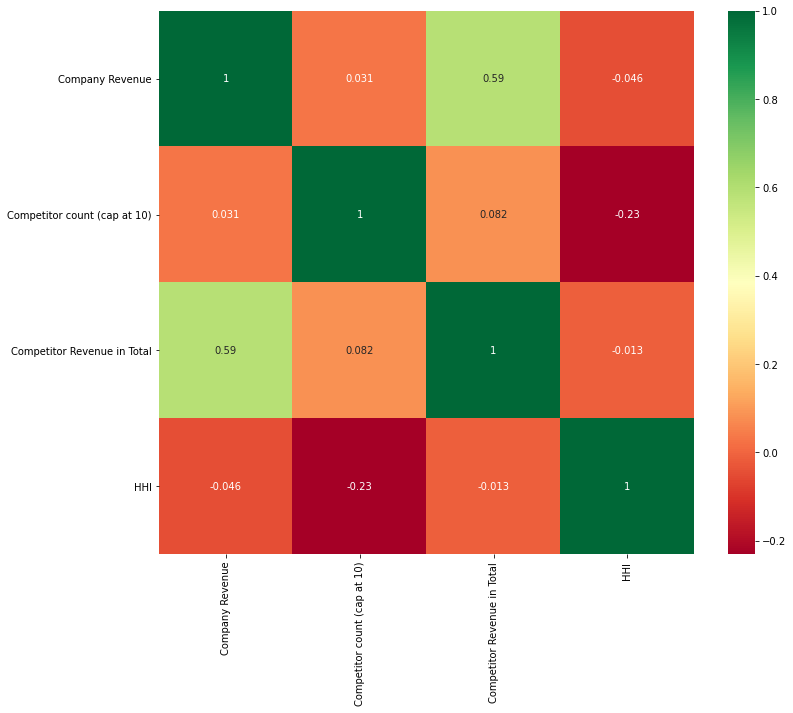

In [30]:
plt.figure(figsize=(12,10)) 
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  

In [22]:
#Competitive Count of Company on scale of 10
import plotly.express as px

fig = px.bar(df,y= 'Competitor count (cap at 10)',x='Company.name',orientation='v',title = "Competitive Count of a Company", width=10000, height=500)
fig.show()

In [24]:
#HHI Index of each startups
import plotly.express as px

fig = px.bar(df,y='HHI',x='Company.name',orientation='v',title = "HHI index of a Company", width=10000, height=500)
fig.show()

In [29]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     \ 38.4MB 21.5MB/s
     |████████████████████████████████| 10.1MB 22.4MB/s 
     |████████████████████████████████| 645kB 41.5MB/s 
     |████████████████████████████████| 112kB 49.2MB/s 
     |████████████████████████████████| 1.1MB 38.3MB/s 
     |████████████████████████████████| 3.1MB 28.1MB/s 
     |████████████████████████████████| 71kB 9.5MB/s 
     |████████████████████████████████| 81kB 10.7MB/s 
     |████████████████████████████████| 819kB 38.4MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248525 sha256=a8866bef3771b683f784eeb5f724537cb2c3a157c209c0941a06ffccae074001
  Stored in directory: /tmp/pip-ephem-wheel-cache-0ozkw3h4/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27099 sha256=c18caff5ce729f7f4b983c95cad222d631775cdfb10c4fcfcf7133280eab1bd1
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f9

In [33]:
from pandas_profiling import ProfileReport

In [34]:
profile= ProfileReport( df, title= "kaggle_startup_data", html={'style' : {'full_width' : True}})

In [35]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]